참고 URL : [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

# 캐글러를 대상으로 설문조사
* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 사용 가능한 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님 
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


# 데이터 파일
5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [69]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [65]:
question.tail(20)

,Column,Question,Asked
270,JobSatisfaction,On a scale from 0 (Highly Dissatisfied) - 10 (...,CodingWorker
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners
273,JobHuntTime,How many hours per week have you typically spe...,Learners
274,JobFactorLearning,How are you assessing potential job opportunit...,Learners
275,JobFactorSalary,How are you assessing potential job opportunit...,Learners
276,JobFactorOffice,How are you assessing potential job opportunit...,Learners
277,JobFactorLanguages,How are you assessing potential job opportunit...,Learners
278,JobFactorCommute,How are you assessing potential job opportunit...,Learners
279,JobFactorManagement,How are you assessing potential job opportunit...,Learners


In [4]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [66]:
mcq.head(5)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 주관식 응답을 가져 옴
ff = pd.read_csv('data/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [8]:
ff.columns

Index(['GenderFreeForm', 'KaggleMotivationFreeForm', 'CurrentJobTitleFreeForm',
       'MLToolNextYearFreeForm', 'MLMethodNextYearFreeForm',
       'LanguageRecommendationFreeForm', 'PublicDatasetsFreeForm',
       'PersonalProjectsChallengeFreeForm',
       'LearningPlatformCommunityFreeForm', 'LearningPlatformFreeForm1',
       'LearningPlatformFreeForm2', 'LearningPlatformFreeForm3',
       'LearningPlatformUsefulnessCommunitiesFreeForm',
       'LearningPlatformUsefulnessFreeForm1Select',
       'LearningPlatformUsefulnessFreeForm1SelectFreeForm',
       'LearningPlatformUsefulnessFreeForm2Select',
       'LearningPlatformUsefulnessFreeForm2SelectFreeForm',
       'LearningPlatformUsefulnessFreeForm3Select',
       'LearningPlatformUsefulnessFreeForm3SelectFreeForm',
       'BlogsPodcastsNewslettersFreeForm',
       'JobSkillImportanceOtherSelect1FreeForm',
       'JobSkillImportanceOtherSelect2FreeForm',
       'JobSkillImportanceOtherSelect3FreeForm', 'CoursePlatformFreeForm',
  

In [9]:
ff.head(5)

,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,...,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


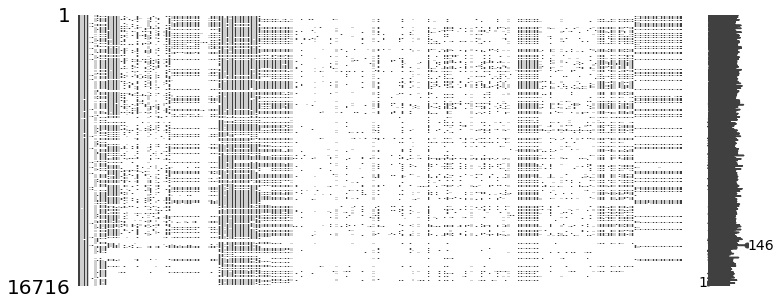

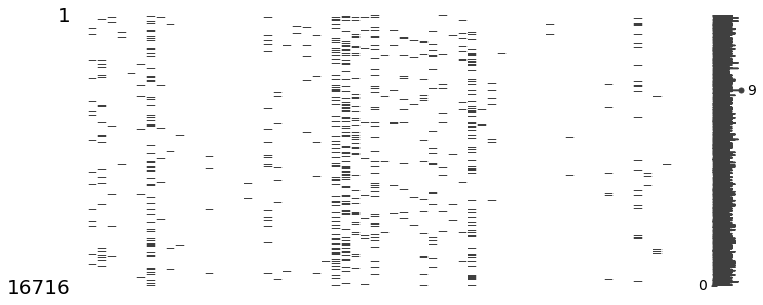

In [10]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

msno.matrix(ff, figsize=(12,5))

* 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# 설문통계

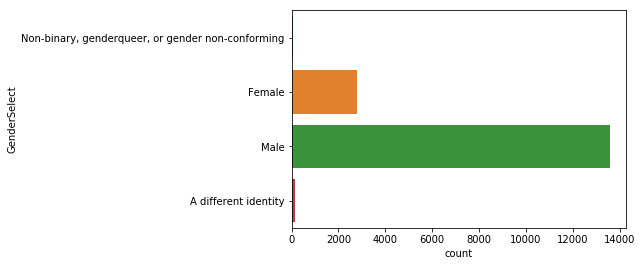

In [68]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [12]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [13]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

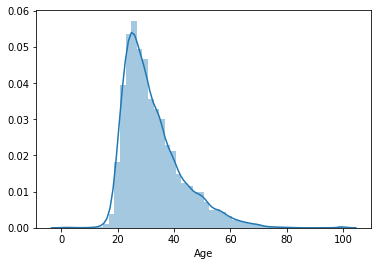

In [14]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리며, 
20대부터 급격히 늘어나며, 30대가 가장 많다. 
평균 나이는 32세이며, 중간나이는 30세다.

## 학력

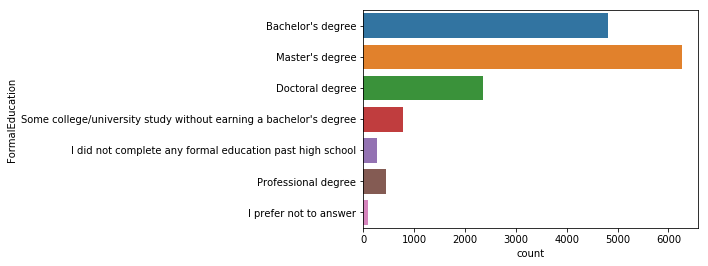

In [15]:
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다.

## 전공

In [16]:
# value_counts 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다. 
# normalize=True 옵션을 사용하면, 
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

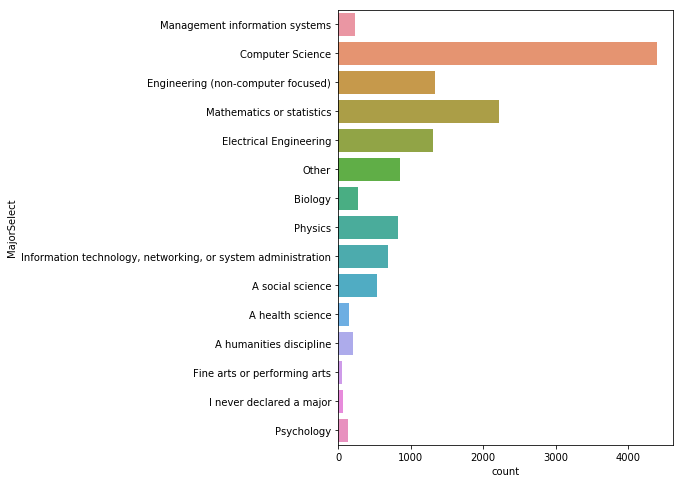

In [17]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업 여부

In [18]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


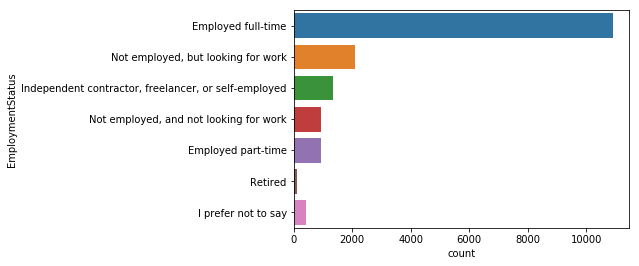

In [19]:
sns.countplot(y='EmploymentStatus', data=mcq)

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

## 프로그래밍 경험
* 'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

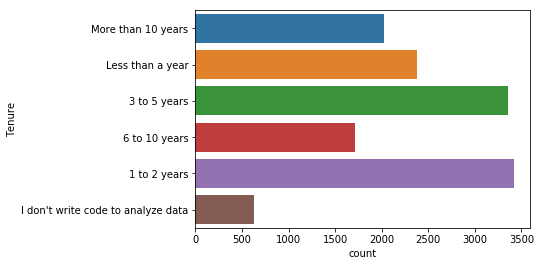

In [20]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


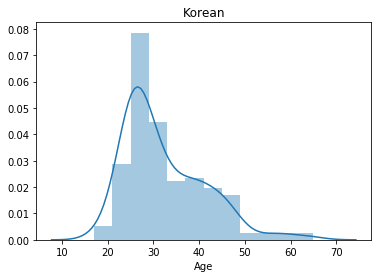

In [21]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

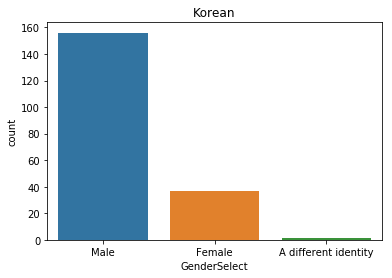

In [22]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')
plt.show()

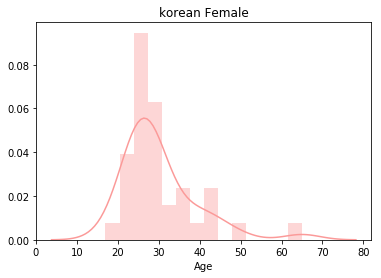

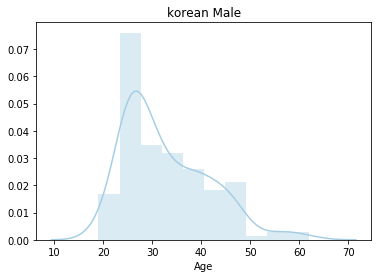

In [23]:
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4])
plt.title('korean Female')
plt.show()
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0])
plt.title('korean Male')
plt.show()

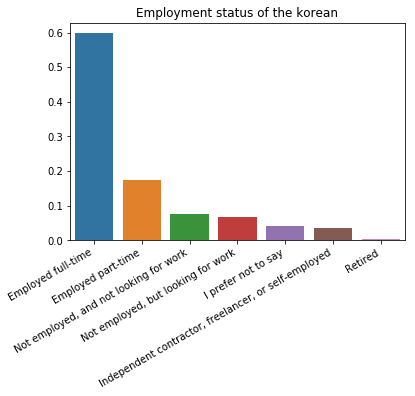

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()


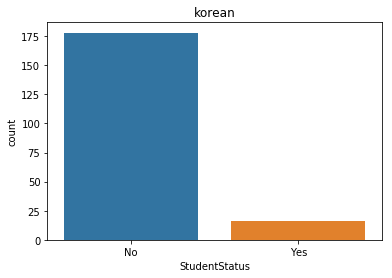

In [25]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [26]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 자주 묻는 질문 FAQ
* 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

### Q1. Python과 R중 어떤 언어를 배워야 할까요?

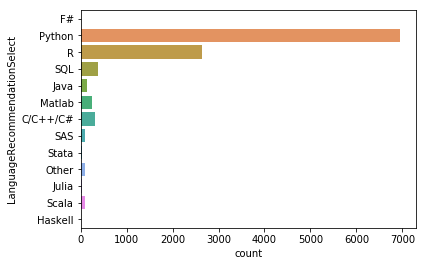

In [27]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아본다. 

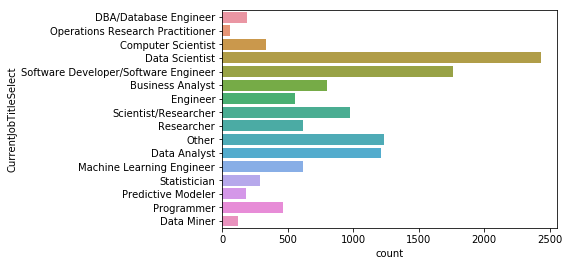

In [28]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [29]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


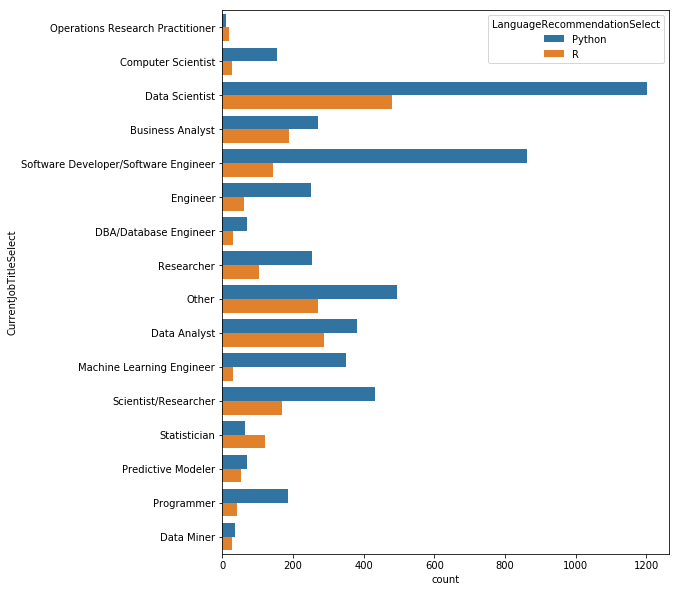

In [30]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계 학자들이다.

## Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

## 데이터사이언스 툴

In [31]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


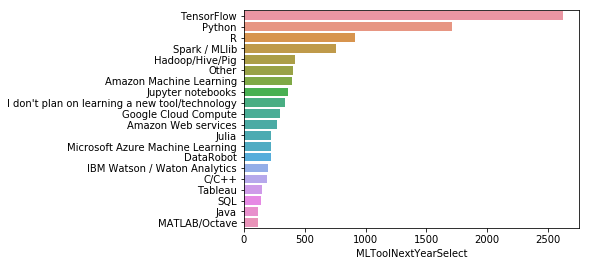

In [32]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다.
그리고 Python이 15%, R은 8% 로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

### 데이터사이언스 방법 Data Science Methods

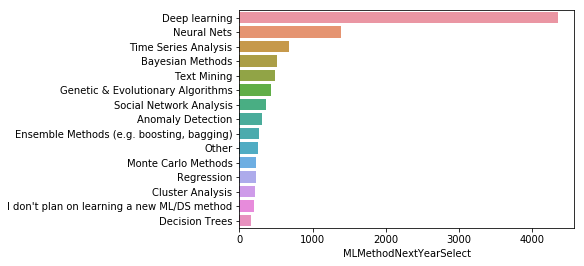

In [33]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다. 

## Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [34]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

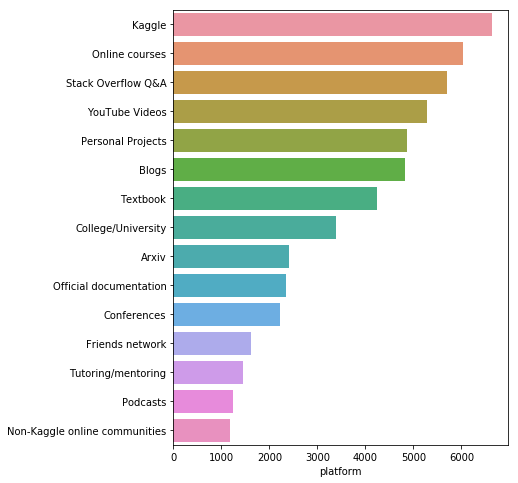

In [35]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

* Kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼 
* 그러나 이 설문 조사를 실시한 Kaggle의 이유로 응답이 편향되었을 수 있음 
* 온라인 코스, 스택 오버플로 및 유튜브 (YouTube) 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [36]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

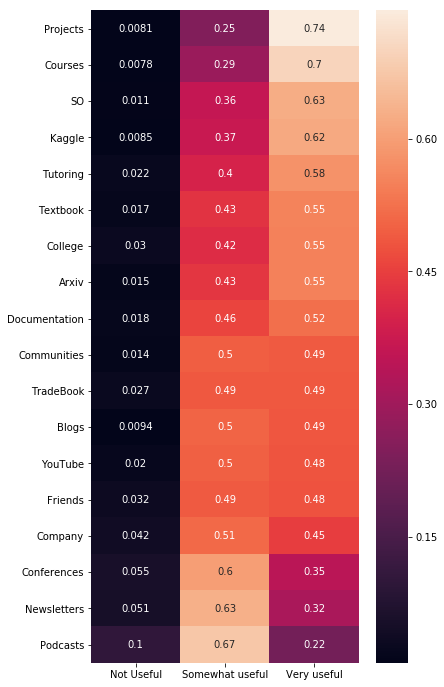

In [37]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose()#.sort_values('Very useful', ascending=False)

#Plot a Heatmap of Learning Platform Usefulness
plt.figure(figsize=(6,12))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

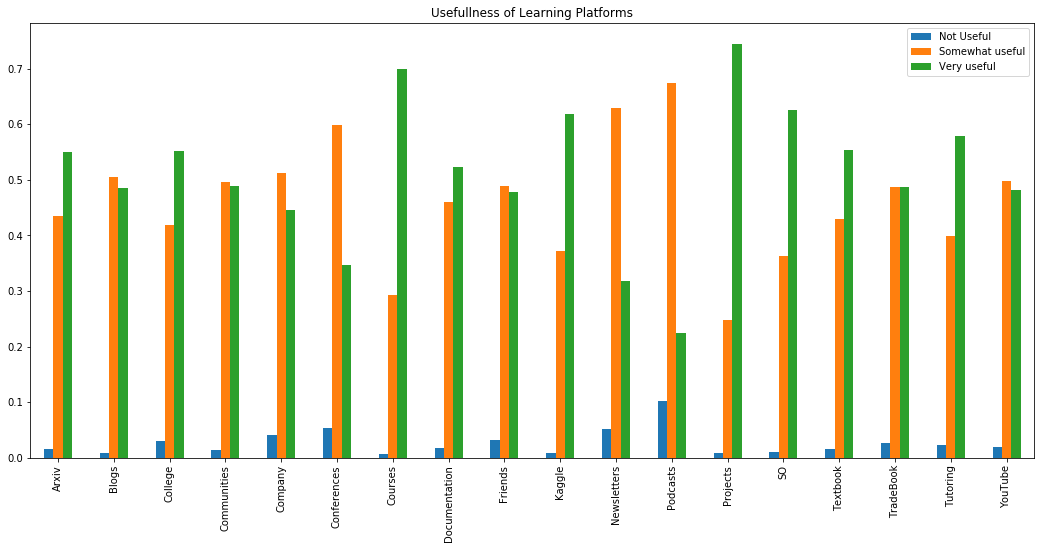

In [38]:
#Plot a grouped barplot of Learning Platform Usefulness
fdf.plot(kind='bar', figsize=(18,8), title="Usefullness of Learning Platforms")
plt.show()

실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 응답했고 매우 유용하다고 표시했다. 팟캐스트는 그다지 유용하지 않다고 답변한 응답자가 많았다.

In [39]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]

In [40]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)
cdf

Kaggle            5.531434
OnlineCourses    27.375514
Other             1.795940
SelftTaught      33.366771
University       16.988607
Work             15.217593
dtype: float64

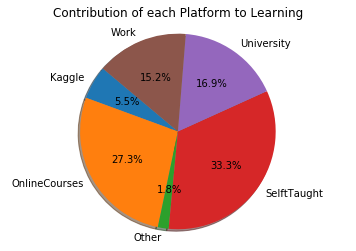

In [41]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

## Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?


In [42]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [43]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [44]:
pd.DataFrame(s[s != 'nan'].value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


## Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

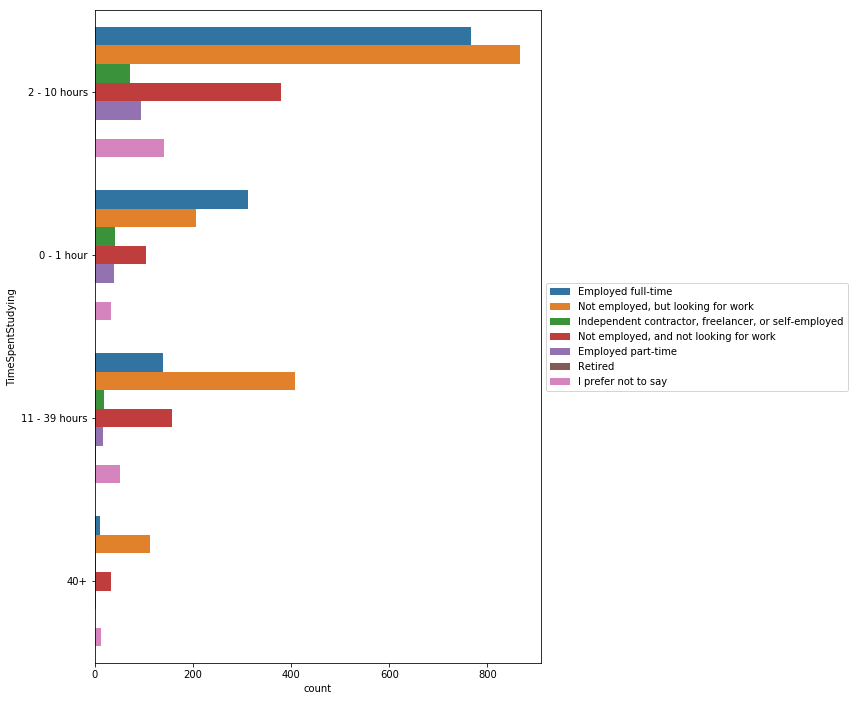

In [45]:
plt.figure(figsize=(8,12))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이기 때문에 나누어 볼 필요가 있다.

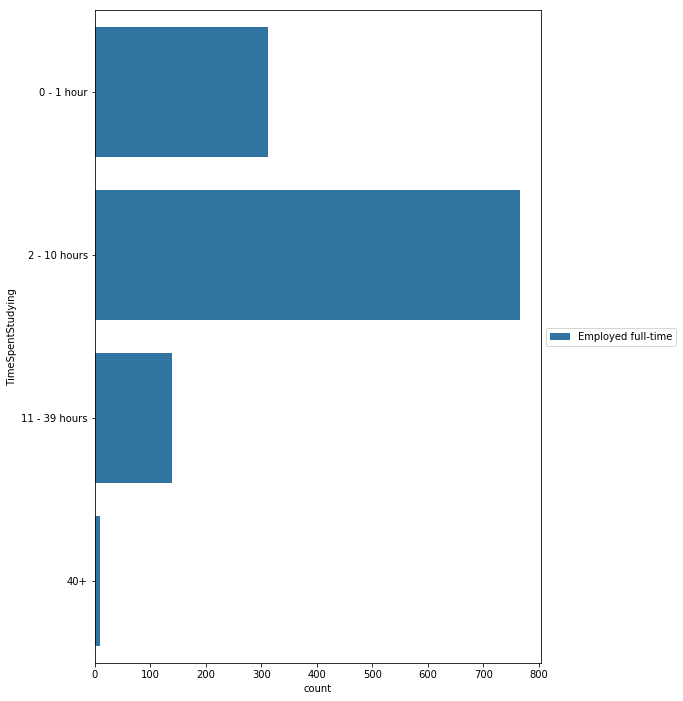

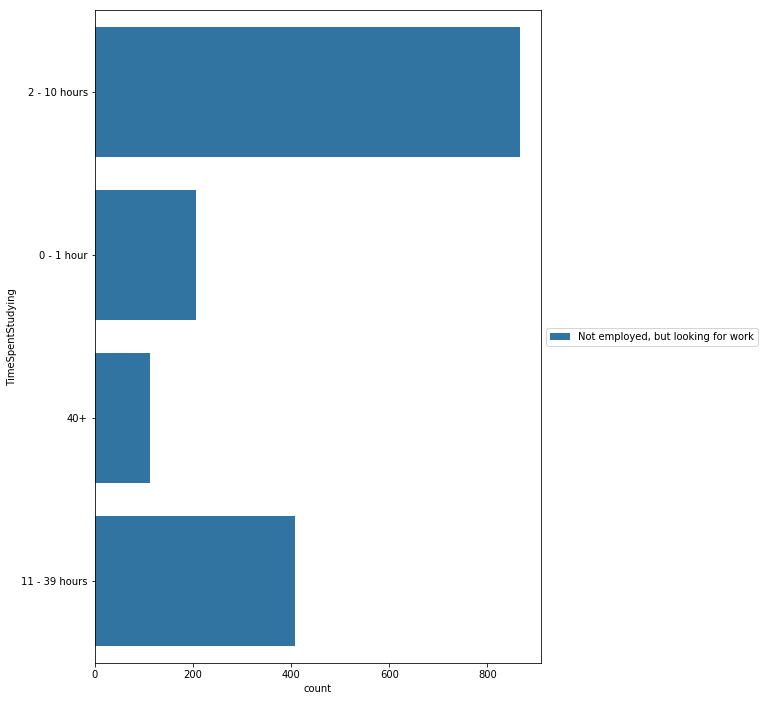

In [46]:
plt.figure(figsize=(8,12))
sns.countplot(y='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(8,12))
sns.countplot(y='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [47]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))

In [48]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'

In [49]:
s = s[s != 'nan'].value_counts().head(20)

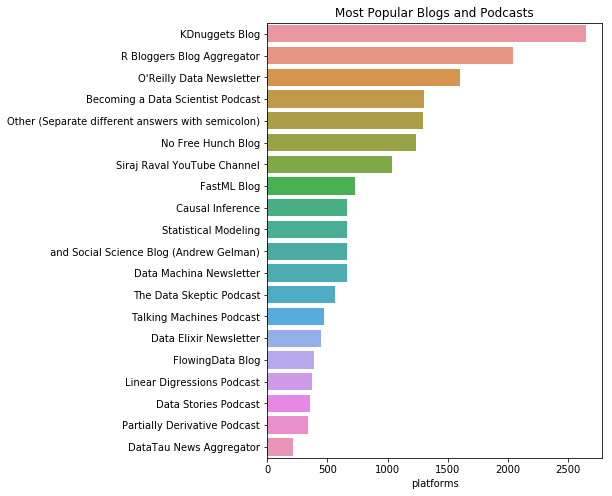

In [50]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

KDNuggets Blog, R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter 가 가장 유용하다고 투표를 받았다.
데이터 사이언스 되기라는 팟캐스트도 유명한 듯 하다.

In [51]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))

In [52]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'

In [53]:
t = t[t != 'nan'].value_counts()

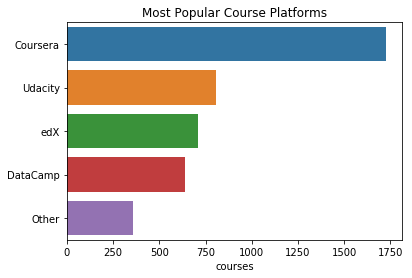

In [54]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

Coursera와 Udacity가 가장 인기있는 플랫폼이다.

## Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [55]:
job_features = [
    x for x in mcq.columns if x.find('JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

In [56]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
EnterpriseTools,0.144829,0.564970,0.290200
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
Stats,0.513889,0.457576,0.028535
Visualizations,0.455392,0.490820,0.053788


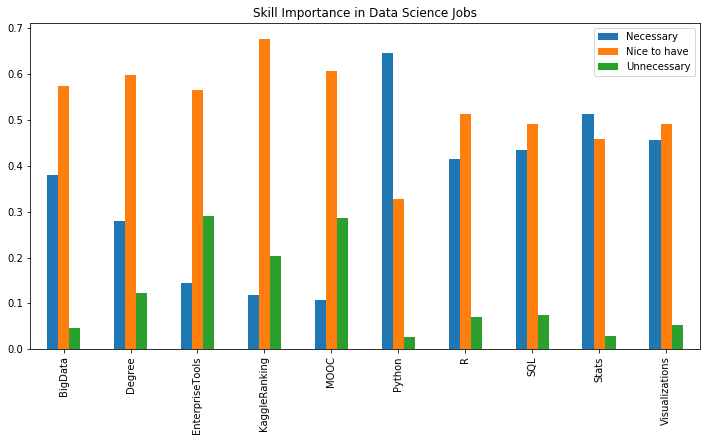

In [57]:
jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")

꼭 필요한 것으로 Python, R, SQL, 통계, 시각화가 있다.

있으면 좋은 것은 빅데이터, 학위, 툴 사용법, 캐글랭킹, 무크가 있다.

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [58]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [59]:
def clean_salary(x):
    x = x.replace(',', '')
    try:
        return float(x)
    except:
        return np.nan

In [60]:
def salary_stats(country):
    data = mcq[(
        mcq['CompensationAmount'].notnull()) & (
        mcq['Country'] == country) ]
    data['CompensationAmount'] = data[
        'CompensationAmount'].apply(clean_salary)
    amount = data[data['CompensationAmount'] < 1e9][
        'CompensationAmount']
    print(amount.describe())
    sns.distplot(amount)

count    5.700000e+02
mean     1.105683e+06
std      1.575944e+06
min      0.000000e+00
25%      1.625000e+05
50%      6.590000e+05
75%      1.600000e+06
max      2.300000e+07
Name: CompensationAmount, dtype: float64


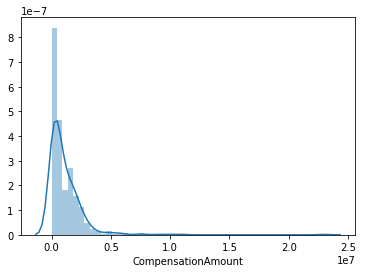

In [61]:
salary_stats('India')

count    1.544000e+03
mean     1.178799e+05
std      9.542697e+04
min      0.000000e+00
25%      7.500000e+04
50%      1.050200e+05
75%      1.452500e+05
max      2.500000e+06
Name: CompensationAmount, dtype: float64


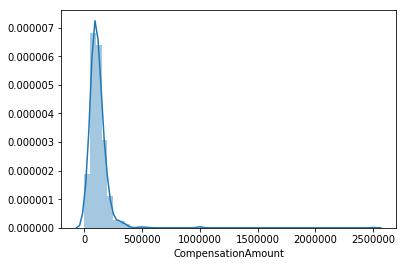

In [62]:
salary_stats('United States')

count    3.500000e+01
mean     2.721797e+07
std      4.056061e+07
min      1.000000e+03
25%      5.000000e+04
50%      8.000000e+05
75%      4.750000e+07
max      2.000000e+08
Name: CompensationAmount, dtype: float64


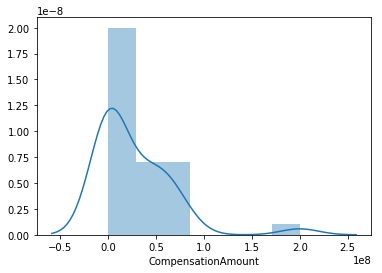

In [63]:
salary_stats('South Korea')